In [113]:
from matplotlib import pyplot as plt

## Binomial distribution

Binomial distribution is a distibution of the number of successes in N trials with a fixed probability of success.

In [42]:
from math import factorial, sqrt

def P_binomial(x, n, p):
    assert x <= n
    
    return (factorial(n)/(factorial(n-x) * factorial(x))) * p**x * (1-p)**(n-x)



In [15]:
P_binomial(6, 9, 0.8)

0.17616076799999997

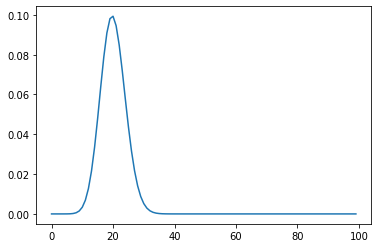

In [22]:
p = 0.2
N = 100
plt.plot([i for i in range(N)], [P_binomial(i, N, p) for i in range(N)])

In [40]:
mean = N*p
mean

20.0

In [39]:
std = sqrt(N*p*(1-p))
std

4.0

### Normal approximation to binomial

We can estimate a probability that x is more/less than some value directly like this:

In [102]:
x = 20
N = 100
p = 0.3

Exact probability of seeing less than or equal to 10 sucesses in a hundred trials

In [103]:
p_less = sum(P_binomial(i, N, p) for i in range(0, x+1))
p_less

0.016462853241869378

Exact probability of seeing more than 10 sucesses in a hundred trials

In [104]:
1 - p_less

0.9835371467581306

We can also approximate this probability using normal distribution. We need to compute z-score and infer the probability from z-score table

In [105]:
import scipy.stats as st

In [106]:
mean = N*p
std = sqrt(N*p*(1-p))

z = (x - mean)/std

In [107]:
st.norm.cdf(z), 1 - st.norm.cdf(z)

(0.014548165870626094, 0.9854518341293739)

It's not very accurate. But it can be fixed with continuity correction.

In [110]:
# if we want a less or equal we need to include some more of x to the right (so +0.5)
z = ((x+0.5) - mean)/std


# if we wanted a strictly less we would need to exclude exactly x to the left (so -0.5)

# if we wanted a strictly more we would need to exclude exactly x to the right (so +0.5)

# if we wanted a more or equal we would need to include some x to the left (so -0.5)


In [111]:
st.norm.cdf(z), 1 - st.norm.cdf(z)

(0.019082884729415002, 0.980917115270585)

# Geometric distibution

a) Distribution of the number of trials needed to get one success  
b) Distribution of the number of failures before the first success with fixed probability of success

In [143]:
from math import sqrt

# a option
# does not work for 0 because you need a trial to get something
def P_geometric_shifted(x, p):
    return (1-p)**(x-1) * p


# b option
# zero failures assigned a prob too
def P_geometric(x, p):
    return (1-p)**(x) * p

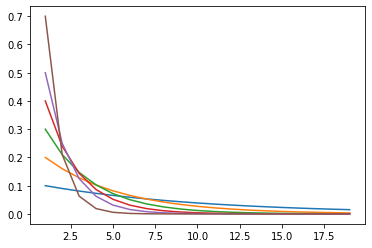

In [144]:
N = 20
plt.plot([i for i in range(1, N)], [P_geometric_shifted(i, 0.1) for i in range(1, N)])
plt.plot([i for i in range(1, N)], [P_geometric_shifted(i, 0.2) for i in range(1, N)])
plt.plot([i for i in range(1, N)], [P_geometric_shifted(i, 0.3) for i in range(1, N)])
plt.plot([i for i in range(1, N)], [P_geometric_shifted(i, 0.4) for i in range(1, N)])
plt.plot([i for i in range(1, N)], [P_geometric_shifted(i, 0.5) for i in range(1, N)])
plt.plot([i for i in range(1, N)], [P_geometric_shifted(i, 0.7) for i in range(1, N)])

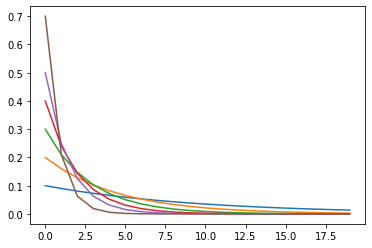

In [146]:
N = 20
plt.plot([i for i in range(N)], [P_geometric(i, 0.1) for i in range(N)])
plt.plot([i for i in range(N)], [P_geometric(i, 0.2) for i in range(N)])
plt.plot([i for i in range(N)], [P_geometric(i, 0.3) for i in range(N)])
plt.plot([i for i in range(N)], [P_geometric(i, 0.4) for i in range(N)])
plt.plot([i for i in range(N)], [P_geometric(i, 0.5) for i in range(N)])
plt.plot([i for i in range(N)], [P_geometric(i, 0.7) for i in range(N)])

In [159]:
# a option
p = 0.6
mean = 1/p

std = sqrt( (1-p) / p**2)
mean, std

(1.6666666666666667, 1.0540925533894598)

In [160]:
# b option
p = 0.6
mean = (1-p)/p

std = sqrt( (1-p) / p**2)
mean, std

(0.6666666666666667, 1.0540925533894598)

Example: 
A patient is waiting for a donor. If the probability that a randomly selected donor is a match is **P**, what is the expected number of tested donors before a matching donor is found?



In [166]:
# a option
# if it's a 10 % chance then on average we need to test 10 people
p = 0.1
(1)/p

10.0

In [167]:
# b option
# if it's a 10 % chance then on average we need to fail 9 times before we find a donor
p = 0.1
(1-p)/p

9.0

# Hypergeometric distribution

Distribution of the number of successes in n trials without replacement when population size and possible number of successes are known.

In [212]:
from math import factorial, sqrt

# C_n_k (c из n по k) -  n! / ((n-k)! * k! )
 

def P_hypergeometric(k, n, K, N):
    
    C_N_n = factorial(N) / (factorial(N-n) * factorial(n))
    C_K_k = factorial(K) / (factorial(K-k) * factorial(k))
    
    C_NK_nk = factorial(N-K) / (factorial((N-K)-(n-k)) * factorial(n-k))
    
    return (C_K_k * C_NK_nk) / C_N_n



In [214]:
N = 100
K = 10
n = 5
k = 1


P_hypergeometric(k,n,K,N)

0.3393909110035767

In [217]:
mean = (n*K)/N
mean

0.5

## Negative binomial distribution

Distribuition of the number of successes before a certain number of failures is reached with fixed probability

In [169]:
from math import factorial, sqrt

def P_binomial_negative(s, f, p):
    return (factorial(f+s-1)/(factorial(s-1) * factorial(f))) * p**s * (1-p)**(f)



In [199]:
s = 9
f = 2
p = 0.9

In [200]:
P_binomial_negative(s, f, p)

0.17433922004999994

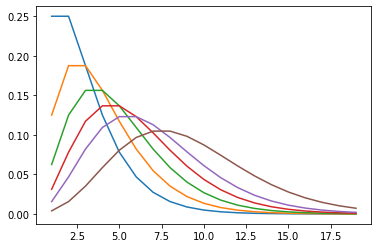

In [193]:
N = 20
p = 0.5
plt.plot([i for i in range(1, N)], [P_binomial_negative(i, 1, p) for i in range(1, N)])
plt.plot([i for i in range(1, N)], [P_binomial_negative(i, 2, p) for i in range(1, N)])
plt.plot([i for i in range(1, N)], [P_binomial_negative(i, 3, p) for i in range(1, N)])
plt.plot([i for i in range(1, N)], [P_binomial_negative(i, 4, p) for i in range(1, N)])
plt.plot([i for i in range(1, N)], [P_binomial_negative(i, 5, p) for i in range(1, N)])
plt.plot([i for i in range(1, N)], [P_binomial_negative(i, 7, p) for i in range(1, N)])

If we repeated the trials many times on average we would get this number of successes:

In [197]:
mean = f*p / (1-p)
mean

18.000000000000004

In [207]:
std = sqrt((f*p)/((1-p)**2))
std

13.41640786499874

# Poisson distribution

Distribution of the number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently

In [221]:
from math import factorial, e


def P_poisson(k, rate):
    return ((rate**k) * (e**(-rate)))  / factorial(k)



In [224]:
k = 3
rate = 3
P_poisson(k, rate)

0.22404180765538775

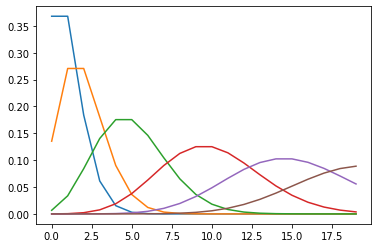

In [230]:
N = 20
plt.plot([i for i in range(N)], [P_poisson(i, 1) for i in range(N)])
plt.plot([i for i in range(N)], [P_poisson(i, 2) for i in range(N)])
plt.plot([i for i in range(N)], [P_poisson(i, 5) for i in range(N)])
plt.plot([i for i in range(N)], [P_poisson(i, 10) for i in range(N)])
plt.plot([i for i in range(N)], [P_poisson(i, 15) for i in range(N)])
plt.plot([i for i in range(N)], [P_poisson(i, 20) for i in range(N)])

In [232]:
mean = rate
std = sqrt(rate)
mean, std

(3, 1.7320508075688772)